In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/allegations_20200726939.csv', index_col='complaint_id')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33358 entries, 42835 to 35671
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   unique_mos_id             33358 non-null  int64  
 1   first_name                33358 non-null  object 
 2   last_name                 33358 non-null  object 
 3   command_now               33358 non-null  object 
 4   month_received            33358 non-null  int64  
 5   year_received             33358 non-null  int64  
 6   month_closed              33358 non-null  int64  
 7   year_closed               33358 non-null  int64  
 8   command_at_incident       31814 non-null  object 
 9   rank_abbrev_incident      33358 non-null  object 
 10  rank_abbrev_now           33358 non-null  object 
 11  rank_now                  33358 non-null  object 
 12  rank_incident             33358 non-null  object 
 13  mos_ethnicity             33358 non-null  object 
 14  mo

In [4]:
df['dt_received'] = pd.to_datetime(df['month_received'].astype(str) + '/' + df['year_received'].astype(str), format='%m/%Y')
df['dt_closed'] = pd.to_datetime(df['month_closed'].astype(str) + '/' + df['year_closed'].astype(str), format='%m/%Y')
df['dt_received'].min(), df['dt_received'].max()

(Timestamp('1985-09-01 00:00:00'), Timestamp('2020-01-01 00:00:00'))

33,358 complaints that start at September, 1985 and end at January, 2020.

In [5]:
df['name'] = df['first_name'] + ' ' + df['last_name']
df['name'].value_counts().sort_values(ascending=False).head(25)

Daniel Sbarra           75
Mathew Reich            75
Gary Messina            73
Joseph Tallarine        73
Christophe Mccormack    72
William Taylor          65
David Cheesewright      63
Mike Civil              56
Paul Mcmahon            56
Michael Raso            50
Robert Delaney          47
Trevor Baronette        47
Matthew Lewis           47
David Grieco            46
Michael Miller          46
Michael Ernst           45
Kevin Martin            45
Ricardo Bocachica       45
John Rajan              44
Kevin Matthews          44
Robert Henderson        44
Nikolaos Stefopoulos    44
Henry Daverin           44
John Todaro             44
Dion Edwards            43
Name: name, dtype: int64

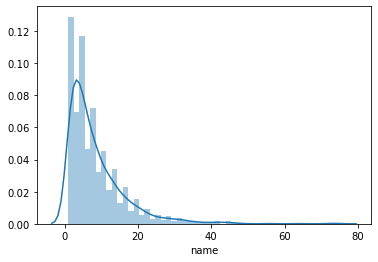

In [6]:
sns.distplot(df['name'].value_counts())

In [7]:
sum(df['name'].value_counts() > 20)

283

# Substantiated Claims

Who are the officers with the most substantiated claims? These are complaints that the Civilian Complaint Review Board (CCRB) of NYC were able to investigate and find evidence for a violation of NYPD rules. This does not necessarily mean officers were punished for these violations, as this is not the jurisdiction of the CCRB. 

In the `board_disposition` column, each claim is categorized as Substantiated, Exonerated, or Unsubstantiated. For all substantiated claims, the CCRB also recommends the type of discipline. 

In [8]:
df['board_disposition']

complaint_id
42835    Substantiated (Command Lvl Instructions)
24601                     Substantiated (Charges)
24601                     Substantiated (Charges)
26146                     Substantiated (Charges)
40253        Substantiated (Command Discipline A)
                           ...                   
35671                             Unsubstantiated
35671                             Unsubstantiated
35671         Substantiated (Formalized Training)
35671         Substantiated (Formalized Training)
35671         Substantiated (Formalized Training)
Name: board_disposition, Length: 33358, dtype: object

In [9]:
substantiated = df[df['board_disposition'].apply(lambda x: 'Substantiated' in x)]
print('%.2f percent of claims were substantiated by the CCRB.' % (len(substantiated) / len(df) * 100))

24.88 percent of claims were substantiated by the CCRB.


In [14]:
substantiated['name'].value_counts().sort_values(ascending=False).head(25)

Joseph Tallarine        23
Robert Henderson        21
Kevin Martin            18
Derrick Kreckmann       17
David Cheesewright      16
Christophe Mccormack    16
Daniel Sbarra           16
Jamaal Miller           15
Dustin Genco            14
Charles Cavallaro       14
Michael Raso            14
Gary Calhoun            14
Michael Dicecco         13
Paul Chierico           12
Scott Hampton           12
Patrick Hennessy        12
Joseph Castaldo         12
James Slavin            11
Carlos Fabara           11
David Leonardi          11
Christophe Greiner      11
Robert Nugent           11
Risel Martinez          10
Angel Gonzalez          10
Ted Saintgerard         10
Name: name, dtype: int64

Let's see what the distribution of substantiated complaints looks like. 

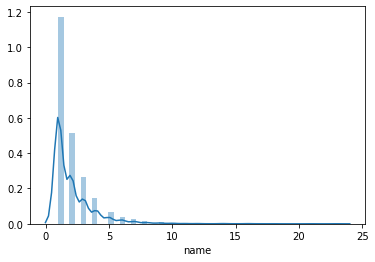

In [11]:
sns.distplot(substantiated['name'].value_counts())

In [24]:
n = substantiated['name'].value_counts()
n = n[n >= 10]
top_substantiated = substantiated[substantiated['name'].isin(n.index)]
len(top_substantiated)

414

In [27]:
top_substantiated['dt_received']

complaint_id
11354   2006-05-01
11354   2006-05-01
11354   2006-05-01
21995   2010-11-01
21995   2010-11-01
           ...    
17528   2009-02-01
17528   2009-02-01
17528   2009-02-01
28122   2013-05-01
32425   2015-04-01
Name: dt_received, Length: 414, dtype: datetime64[ns]

## Time of report

Text(0, 0.5, 'count')

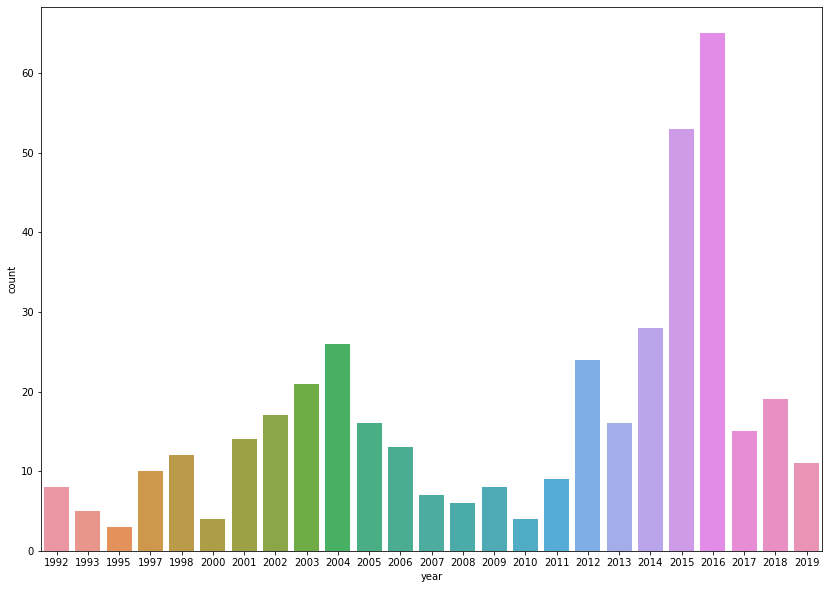

In [33]:
plt.figure(figsize=(14, 10))
x = top_substantiated['year_received'].value_counts().sort_index()
sns.barplot(x.index, x.values)
plt.xlabel('year')
plt.ylabel('count')

## FADO Type

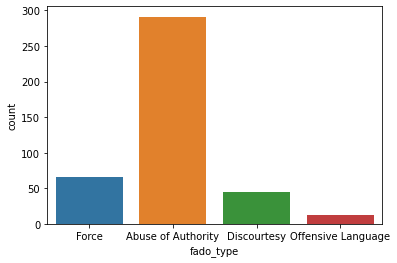

In [35]:
sns.countplot(top_substantiated['fado_type'])

Of the top substantiated offenders, most complaints fall under abuse of authority. 

In [37]:
top_substantiated[['name', 'fado_type', 'allegation']].groupby(['name', 'fado_type']).count()

allegation
name               fado_type                     
Alberto Angilletta Abuse of Authority           8
                   Discourtesy                  1
                   Offensive Language           1
Angel Gonzalez     Abuse of Authority           9
                   Discourtesy                  1
...                                           ...
Scott Hampton      Force                        1
Ted Saintgerard    Abuse of Authority           2
                   Discourtesy                  4
                   Force                        3
                   Offensive Language           1

[87 rows x 1 columns]